In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading CSV dataset
df=pd.read_csv('C://Users//arjun//Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Cecking the dataset datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#Checking any missing values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
#X=df[['Annual Income (k$)','Spending Score (1-100)']]
X=df.iloc[:,[3,4]].values
#print(X)

In [6]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
kmeans=KMeans()
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##### Finding optimal value of K

In [7]:
#wcss- with clustering sum of squares
wcss=[]
for i in range(1,11): # considering first 10 clusters
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

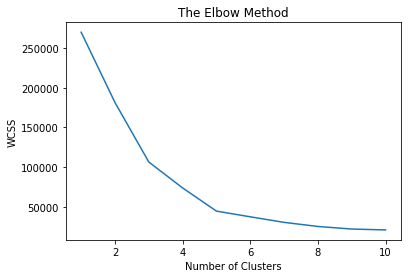

In [8]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [9]:
# By observeing the above Elbow method grpah K=5 gives the optimal values
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [10]:
#Predicting values
y_kmeans=(kmeans.predict(X))
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

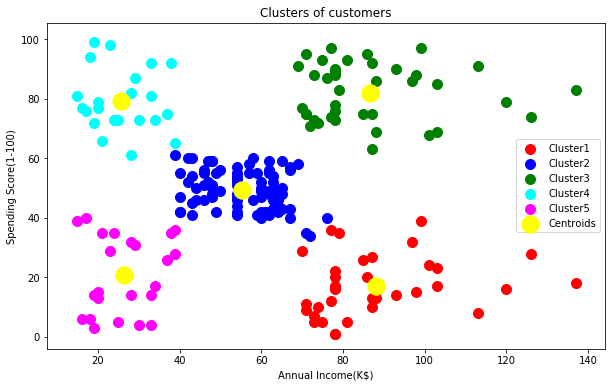

In [11]:
#Visualize the clusters
plt.figure(figsize=(10,6))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [12]:
# From the above Customers clusters graphs i  analysed:
# Red cluster group people are earning more but spending less
# Green cluster group people are earning more but spending more
# Blue  cluster group people are earning Medium but spending Medium - These group of peoples are always safer side.